In [47]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import skfuzzy as fuzz
from sklearn.metrics import fowlkes_mallows_score

In [16]:
ratings = pd.read_csv(Path('..','res','data','ratings.csv'))

users = pd.read_csv(Path('..','res','data','users.csv'))
#users['user_id'] = users['user_id'].apply(lambda x: x-1)

movies = pd.read_csv(Path('..','res','data','movies.csv'))
#movies['movie_id'] = movies['movie_id'].apply(lambda x: x-1)

In [34]:
label_encoder = LabelEncoder()
users['gender'] = label_encoder.fit_transform(users['gender'])
users['occupation'] = label_encoder.fit_transform(users['occupation'])

In [35]:
ratings_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating')
ratings_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings_matrix_np = ratings_matrix.to_numpy()

In [36]:
train_set, test_set = train_test_split(ratings_matrix, test_size=0.2, random_state=42)

In [37]:
test_set.index.to_list()

[97,
 266,
 811,
 24,
 31,
 281,
 569,
 260,
 332,
 324,
 423,
 468,
 287,
 894,
 869,
 639,
 539,
 500,
 482,
 335,
 849,
 771,
 926,
 40,
 364,
 765,
 308,
 445,
 714,
 705,
 77,
 818,
 596,
 372,
 166,
 756,
 251,
 883,
 437,
 240,
 108,
 68,
 175,
 159,
 140,
 755,
 732,
 307,
 533,
 695,
 803,
 64,
 236,
 766,
 900,
 87,
 693,
 724,
 779,
 517,
 661,
 588,
 327,
 219,
 210,
 657,
 71,
 929,
 650,
 469,
 847,
 200,
 480,
 448,
 522,
 676,
 941,
 137,
 209,
 626,
 214,
 573,
 356,
 622,
 73,
 478,
 45,
 892,
 591,
 614,
 507,
 267,
 169,
 333,
 452,
 310,
 261,
 607,
 939,
 823,
 434,
 328,
 731,
 886,
 303,
 618,
 61,
 248,
 708,
 410,
 211,
 670,
 389,
 67,
 352,
 276,
 524,
 560,
 381,
 262,
 449,
 897,
 586,
 255,
 282,
 853,
 498,
 121,
 111,
 616,
 425,
 885,
 193,
 893,
 930,
 542,
 371,
 589,
 426,
 138,
 312,
 729,
 306,
 706,
 508,
 523,
 863,
 674,
 395,
 535,
 79,
 599,
 794,
 781,
 430,
 606,
 529,
 854,
 66,
 142,
 785,
 527,
 775,
 627,
 311,
 745,
 681,
 383,
 612,
 

In [38]:
users_train = users[~users['user_id'].isin(test_set.index.to_list())]
ratings_train = ratings[~ratings['user_id'].isin(test_set.index.to_list())]

## K-modes

In [39]:
data_to_clustering = users_train[['age','gender','occupation']]

znalezienie optymalnej liczby klastrów

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1542.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30, cost: 1320.0
Run 1, iteration: 2/100, moves: 0, cost: 1320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1368.0
Init: initializing centroids
Init

Text(0, 0.5, 'Koszt')

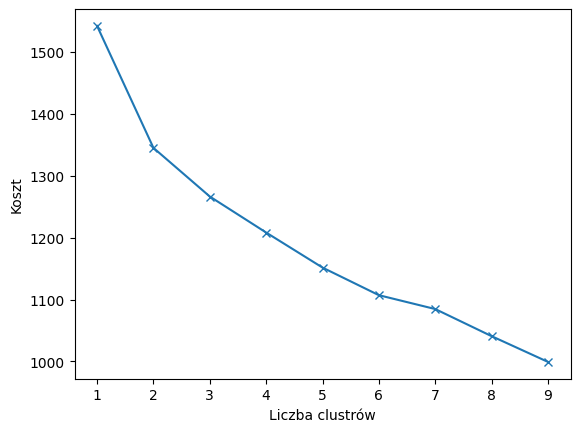

In [32]:
K = range(1,10)
repeat = 5
clustering_quality = np.zeros((repeat, K[-1]))

for j in range(repeat):
    for k in K:
        k_modes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
        clusters = k_modes.fit_predict(data_to_clustering)
        clustering_quality[j,k-1] = k_modes.cost_
        
avg_clust_quality =np.mean(clustering_quality, axis=0) #średnia po kolumnach

plt.plot(K, avg_clust_quality, 'x-')
plt.xlabel("Liczba clustrów")
plt.ylabel("Koszt")

zbudowanie modelu z 5 klastrami

In [40]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1) 
clusters = kmode.fit_predict(data_to_clustering) 
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26, cost: 1202.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 38, cost: 1253.0
Run 2, iteration: 2/100, moves: 0, cost: 1253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 125, cost: 1159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 14, cost: 1207.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15, cost: 1242.0
Best run was number 3


array([0, 3, 0, 0, 3, 2, 0, 2, 0, 0, 3, 3, 0, 0, 3, 0, 1, 3, 0, 3, 0, 4,
       3, 0, 0, 3, 0, 1, 0, 0, 3, 3, 0, 3, 1, 0, 0, 3, 0, 3, 0, 0, 3, 0,
       3, 1, 0, 1, 4, 0, 1, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 1, 4,
       2, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 3, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       4, 0, 2, 1, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0, 3, 0, 3, 2, 0, 3, 4, 0,
       1, 0, 4, 0, 1, 0, 1, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 4, 0, 0, 1,
       0, 4, 0, 0, 3, 4, 4, 3, 3, 0, 4, 3, 0, 1, 4, 0, 0, 2, 1, 0, 0, 3,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 3, 0, 3, 0, 0, 3, 2,
       1, 0, 0, 0, 0, 1, 3, 3, 3, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 0, 1, 2, 2, 0, 3, 3,
       0, 0, 3, 3, 0, 3, 3, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3,
       3, 2, 0, 1, 0, 0, 0, 1, 0, 1, 3, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 1,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 4, 0, 3, 3, 4, 0, 3, 0, 0, 0, 4, 3,
       0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 2,

In [42]:
users_grouped = users_train.copy()
users_grouped['cluster'] = clusters
users_grouped

,user_id,age,gender,occupation,zip_code,cluster
0,1,24,1,19,85711,0
1,2,53,0,13,94043,3
2,3,23,1,20,32067,0
3,4,24,1,19,43537,0
4,5,33,0,13,15213,3
...,...,...,...,...,...,...
935,936,24,1,13,32789,4
936,937,48,1,3,98072,0
939,940,32,1,0,02215,0
941,942,48,0,10,78209,3


# FCM

In [43]:
data_to_fcm = ratings_train[['movie_id','rating']]

In [44]:
data_to_fcm.head()

,movie_id,rating
0,242,3
1,302,3
2,377,1
3,51,2
5,474,4


In [45]:
data_to_fcm.dtypes

movie_id    int64
rating      int64
dtype: object

na razie przyjmuję, że K = 100

In [58]:
K_FCM = 100
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_to_fcm.T, K_FCM, 2, error=0.005, maxiter=1000)
labels = np.argmax(u, axis=0)

In [60]:
ratings_grouped = ratings_train.copy()
ratings_grouped['cluster'] = labels

In [61]:
ratings_grouped

,user_id,movie_id,rating,timestamp,cluster
0,196,242,3,881250949,0
1,186,302,3,891717742,90
2,22,377,1,878887116,43
3,244,51,2,880606923,9
5,298,474,4,884182806,76
...,...,...,...,...,...
99994,378,78,3,880056976,80
99995,880,476,3,880175444,76
99996,716,204,5,879795543,4
99998,13,225,2,882399156,53


In [56]:
K = range(80,120)
fm_scores = []
for k in K:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_to_fcm.T, n_clusters, 2, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)

    # Obliczanie indeksu Fowlkesa-Mallowsa
    fm_score = fowlkes_mallows_score(data_to_fcm, labels)
    fm_scores.append(fm_score)
    
plt.plot(K, fm_scores, 'x-')
plt.xlabel('Liczba klastrów')
plt.ylabel('Indeks Fowlkesa-Mallowsa')

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'